In [3]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1

In [4]:
def ecuacion(n,a,b,y0,lamb):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] + h*(lamb*y[i])

    return (t,y)

In [5]:
t, y = ecuacion(100, 0, 1, 1, 10)

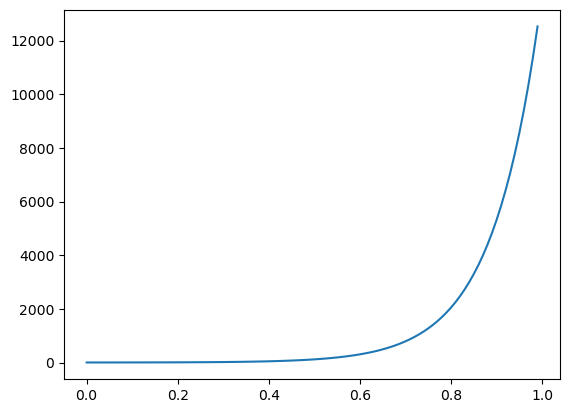

In [6]:
plt.plot(t,y)

Ejercicio 2

In [7]:
def logistica(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*(r*P[i]*(1-(P[i]/K)))

    return (t, P)

In [8]:
K = 100
r = 2
P0 = 10

In [49]:
t, P = logistica(0.01,0,10,P0,r,K)

In [50]:
P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]

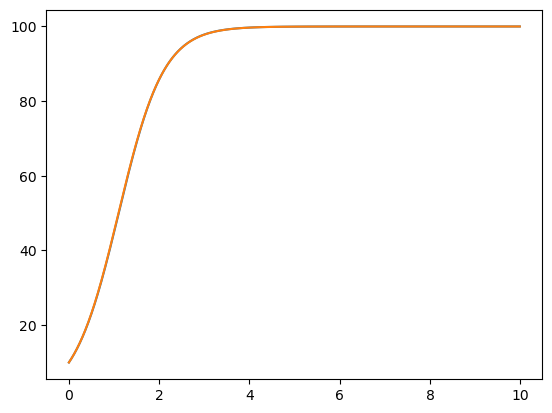

In [51]:
plt.plot(t,P)
plt.plot(t, P1)

In [56]:
def errorh(M):
    e = [0 for i in range(M)]
    h = [0 for j in range(M)]
    for i in range(M):
        H = 2**(-i)
        h[i] = H
        t,P = logistica(H, 0, 10, P0, r, K)
        P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]
        e[i] = abs(P[-1]-P1[-1])
    return (e, h)

In [57]:
e, h = errorh(8)

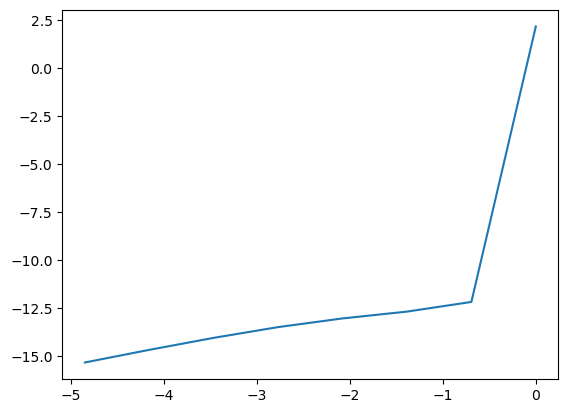

In [59]:
plt.plot(np.log(h),np.log(e))

In [65]:
def f(t, P):
    r*P*(1-(P/K))

In [66]:
def logistica2(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*f(t[i]+(h/2), P[i]+(h/2)*f(t[i], P[i]))

    return (t, P)

In [67]:
t, P = logistica2(0.1, 0, 10, P0, r, K)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'